In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import json
import math
import numpy as np

from allensdk.core.cell_types_cache import CellTypesCache
from allensdk.api.queries.cell_types_api import CellTypesApi

In [3]:
all_features = pd.read_csv("C:/Users/Allose/Notebook/all_features.csv", index_col=0)
all_features_cell_type = pd.read_csv("C:/Users/Allose/Notebook/all_features_cell_type.csv", index_col=0)

transcriptome_df = pd.read_csv("C:/Users/Allose/Notebook/transcriptome_df.csv", index_col=0)
new_transcriptome_df = pd.read_csv('C:/Users/Allose/Notebook/sep_layer_df.csv', index_col=0)
cre_parameter_df = pd.read_csv("C:/Users/Allose/Notebook/cre_parameter_df.csv", index_col=0)
sep_layer_cre_parameter_df = pd.read_csv('sep_layer_cre_parameter_df.csv', index_col=0)
new_label_df = pd.read_csv("C:/Users/Allose/Notebook/new_label_transcriptome_df.csv", index_col=0)
entrenz_symbol_s = pd.Series.from_csv("C:/Users/Allose/Notebook/entrenz_symbol_s.csv", index_col=0)
f = open("new_spearman_corr_ranks.json","r")
data = json.load(f)
spearman_corr_ranks = data
f.close()

f = open("sep_spearman_corr_ranks.json","r")
data = json.load(f)
sep_spearman_corr_ranks = data
f.close()


sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2.5})

parameters = ['gbar_Im', 'gbar_Ih', 'gbar_NaTs', 'gbar_Nap', 'gbar_K_P', 'gbar_K_T', 'gbar_SK', 'gbar_Kv3_1', 'gbar_Ca_HVA', 'gbar_Ca_LVA', 'gamma_CaDynamics', 'decay_CaDynamics', 'soma_g_pas', 'axon_g_pas', 'dend_g_pas', 'apic_g_pas', 'gbar_NaV', 'gbar_Kd', 'gbar_Kv2like', 'gbar_Im_v2']

C:\Users\Allose\Anaconda3\lib\site-packages\pandas\core\series.py:3727: FutureWarning: from_csv is deprecated. Please use read_csv(...) instead. Note that some of the default arguments are different, so please refer to the documentation for from_csv when changing your function calls
  infer_datetime_format=infer_datetime_format)


In [5]:
all_features = all_features[all_features["soma_surface"].notna()]
all_features = all_features[all_features["nm_id"].notna()]
all_features

,average_bifurcation_angle_remote,average_contraction,average_diameter,average_fragmentation,average_parent_daughter_ratio,avg_isi,electrode_0_pa,f_i_curve_slope,fast_trough_t_long_square,fast_trough_t_ramp,...,soma_g_pas,axon_g_pas,dend_g_pas,apic_g_pas,gbar_NaV,gbar_Kd,gbar_Kv2like,gbar_Im_v2,structure_layer,reconstruction_type
0,NaN,0.850561,0.527213,75.133929,0.966709,134.700000,22.697498,0.083355,1.187680,13.295200,...,9.312563e-04,1.506155e-04,9.302760e-05,1.670824e-07,NaN,NaN,NaN,NaN,3,full
19,NaN,0.851035,0.424750,76.550000,0.884581,8.650000,15.299999,0.032146,1.173160,14.217820,...,8.431495e-04,9.995673e-04,5.671443e-06,2.616283e-05,NaN,NaN,NaN,NaN,3,full
25,NaN,0.897780,0.414033,42.266667,0.822614,42.867391,-111.638115,0.325524,1.101295,1.775697,...,5.897852e-04,5.696629e-04,1.204651e-04,NaN,NaN,NaN,NaN,NaN,5,dendrite-only
44,NaN,0.925520,0.594393,87.750000,0.998858,39.338333,-41.105001,0.364333,1.111440,3.734920,...,1.270692e-04,3.017657e-04,1.215206e-05,1.000329e-07,NaN,NaN,NaN,NaN,5,full
64,NaN,0.919328,0.279353,41.273973,0.861677,97.000000,23.797500,0.124640,1.156475,6.003742,...,2.749641e-04,1.866747e-04,1.118354e-05,2.817672e-06,NaN,NaN,NaN,NaN,5,dendrite-only
66,NaN,0.908433,0.421412,44.322222,0.835763,101.536111,20.791873,0.136552,1.275455,3.406938,...,1.406299e-05,1.312304e-04,1.006484e-07,7.215276e-05,NaN,NaN,NaN,NaN,5,dendrite-only
74,NaN,0.897794,0.247356,47.127273,0.779838,80.450455,13.153750,0.222145,1.126865,5.306637,...,1.990249e-04,4.512351e-05,6.359287e-06,2.815157e-05,NaN,NaN,NaN,NaN,4,dendrite-only
78,NaN,0.867570,0.413842,66.156250,0.784640,NaN,-40.657502,0.129997,1.035295,8.761275,...,5.595683e-04,5.414292e-04,4.737021e-04,3.083321e-07,NaN,NaN,NaN,NaN,5,dendrite-only
107,NaN,0.845901,0.896802,99.738095,0.930433,368.660000,-88.739995,0.078595,1.278020,4.220807,...,4.566053e-05,7.283679e-07,1.467076e-05,1.787336e-05,NaN,NaN,NaN,NaN,5,full
109,NaN,0.789621,0.097682,128.000000,0.966092,26.884444,32.990000,0.767680,1.067080,6.448993,...,7.632841e-06,8.918506e-05,1.001606e-07,NaN,0.079961,2.295786e-05,1.146699e-01,4.970771e-07,3,full


In [15]:
absolute = pd.concat([all_features_cell_type[['cell_type']], all_features[['soma_surface']]*all_features[['gbar_Kv3_1']]], axis = 1)
absolute

,cell_type,gbar_Kv3_1,soma_surface
0,False,NaN,NaN
1,False,NaN,NaN
2,False,NaN,NaN
3,False,NaN,NaN
4,False,NaN,NaN
5,False,NaN,NaN
6,False,NaN,NaN
7,False,NaN,NaN
8,False,NaN,NaN
9,False,NaN,NaN


In [16]:
all_features['soma_surface']*all_features['gbar_Kv3_1']

0        213.896562
19       254.608908
25        15.968544
44        68.232324
64        63.267978
66        98.125858
74        18.816621
78        45.501167
107      136.132093
109       11.387689
117       40.392830
120      117.809946
124       19.485632
136       60.979344
139      400.167161
143      234.257313
147       72.644949
155       15.389598
159      244.925678
162       44.538212
178       14.895125
201      228.749926
211       16.067580
213       43.609525
232        0.001029
233      161.616308
239       14.759774
248      811.429839
253      150.123130
257        0.253438
           ...     
2076      16.145366
2084     142.289287
2086      58.938867
2090      27.950649
2116     131.810075
2124    1243.946844
2129     462.361784
2131      21.413943
2141      44.975847
2156     133.905622
2181      71.203990
2185      72.215868
2186      84.964099
2190      56.839506
2194     104.184545
2195      81.612739
2209      31.690376
2214     402.525905
2222      62.902164


In [17]:
all_features['soma_surface']*all_features['gbar_Kv3_1']

0        213.896562
19       254.608908
25        15.968544
44        68.232324
64        63.267978
66        98.125858
74        18.816621
78        45.501167
107      136.132093
109       11.387689
117       40.392830
120      117.809946
124       19.485632
136       60.979344
139      400.167161
143      234.257313
147       72.644949
155       15.389598
159      244.925678
162       44.538212
178       14.895125
201      228.749926
211       16.067580
213       43.609525
232        0.001029
233      161.616308
239       14.759774
248      811.429839
253      150.123130
257        0.253438
           ...     
2076      16.145366
2084     142.289287
2086      58.938867
2090      27.950649
2116     131.810075
2124    1243.946844
2129     462.361784
2131      21.413943
2141      44.975847
2156     133.905622
2181      71.203990
2185      72.215868
2186      84.964099
2190      56.839506
2194     104.184545
2195      81.612739
2209      31.690376
2214     402.525905
2222      62.902164


In [18]:
for para in parameters:
    for index, row in all_features.iterrows():
        all_features.set_value(index, '{}_abs'.format(para), row['soma_surface']*row[para])

C:\Users\Allose\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  This is separate from the ipykernel package so we can avoid doing imports until


In [20]:
all_features.to_csv('abs_all_features.csv')

In [ ]:
abs_conductance = pd.DataFrame()
all_features_cell_type[['cell_type']]
cut = pd.concat([all_features_cell_type, all_features[['soma_surface']]], axis = 1)

for index, row in all_features.iterrows():
    
    cre_line_palette.update({row['driver_lines_label']:row['driver_lines_color']})
    
for parameter in parameters:
    new_cut = pd.concat([cut, all_features[[parameter]]], axis = 1)
    count = new_cut.set_index(["cell_type", "specimen_id"]).count(level="cell_type")
    cell_type_parameter_count = pd.concat([cell_type_parameter_count, count[[parameter]]], axis = 1)

cell_type_parameter_count

In [10]:
abs_conductance = pd.DataFrame()
abs_conductance = pd.concat([all_features_cell_type, all_features[['soma_surface']]], axis = 1)


In [11]:
for parameter in parameters:
    abs_conductance['abs_{}'.format(parameter)] = np.nan
    

In [15]:
for index, row in abs_conductance.iterrows():
    for parameter in parameters:
        abs_conductance.set_value(index, 'abs_{}'.format(parameter), row[parameter]*row['soma_surface'])
        

C:\Users\Allose\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  This is separate from the ipykernel package so we can avoid doing imports until


In [16]:
abs_conductance

,cell_type,gbar_Im,gbar_Ih,gbar_NaTs,gbar_Nap,gbar_K_P,gbar_K_T,gbar_SK,gbar_Kv3_1,gbar_Ca_HVA,...,abs_gamma_CaDynamics,abs_decay_CaDynamics,abs_soma_g_pas,abs_axon_g_pas,abs_dend_g_pas,abs_apic_g_pas,abs_gbar_NaV,abs_gbar_Kd,abs_gbar_Kv2like,abs_gbar_Im_v2
0,False,0.001732,1.027617e-03,5.703488,1.977317e-04,0.095741,0.022960,1.075783e-03,0.481481,0.000315,...,0.912710,284345.839284,0.413708,0.066911,0.041327,0.000074,NaN,NaN,NaN,NaN
1,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [19]:
abs_parameters = []
for parameter in parameters:
    abs_parameters.append('abs_{}'.format(parameter))

In [20]:
abs_parameters

['abs_gbar_Im',
 'abs_gbar_Ih',
 'abs_gbar_NaTs',
 'abs_gbar_Nap',
 'abs_gbar_K_P',
 'abs_gbar_K_T',
 'abs_gbar_SK',
 'abs_gbar_Kv3_1',
 'abs_gbar_Ca_HVA',
 'abs_gbar_Ca_LVA',
 'abs_gamma_CaDynamics',
 'abs_decay_CaDynamics',
 'abs_soma_g_pas',
 'abs_axon_g_pas',
 'abs_dend_g_pas',
 'abs_apic_g_pas',
 'abs_gbar_NaV',
 'abs_gbar_Kd',
 'abs_gbar_Kv2like',
 'abs_gbar_Im_v2']

In [22]:
filtered_layer = ['Gad2-IRES-Cre__L5__inh', 'Htr3a-Cre_NO152__L2/3__inh', 'Htr3a-Cre_NO152__L4__inh', 'Htr3a-Cre_NO152__L5__inh', 
 'Htr3a-Cre_NO152__L6__exc', 'Nr5a1-Cre__L4__exc', 'Ntsr1-Cre_GN220__L6__exc', 'Pvalb-IRES-Cre__L2/3__inh',
 'Pvalb-IRES-Cre__L4__inh', 'Pvalb-IRES-Cre__L5__inh', 'Pvalb-IRES-Cre__L6__inh', 'Rbp4-Cre_KL100__L4__exc', 
 'Rbp4-Cre_KL100__L5__exc', 'Scnn1a-Tg2-Cre__L4__exc', 'Scnn1a-Tg3-Cre__L4__exc', 'Sst-IRES-Cre__L2/3__inh', 
 'Sst-IRES-Cre__L4__inh', 'Sst-IRES-Cre__L5__inh', 'Sst-IRES-Cre__L6__inh']

In [23]:
cre_line_parameter_count = pd.DataFrame()

cut = pd.concat([abs_conductance[['cell_type']], abs_conductance[['dendrite_type']]], axis = 1)

for parameter in abs_parameters:
    new_cut = pd.concat([cut, abs_conductance[[parameter]]], axis = 1)
    count = new_cut.set_index(["cell_type", 'dendrite_type']).count(level="cell_type")
    cre_line_parameter_count = pd.concat([cre_line_parameter_count, count[[parameter]]], axis = 1)

filtered_count = cre_line_parameter_count.loc[filtered_layer]

In [24]:
filtered_count

,abs_gbar_Im,abs_gbar_Ih,abs_gbar_NaTs,abs_gbar_Nap,abs_gbar_K_P,abs_gbar_K_T,abs_gbar_SK,abs_gbar_Kv3_1,abs_gbar_Ca_HVA,abs_gbar_Ca_LVA,abs_gamma_CaDynamics,abs_decay_CaDynamics,abs_soma_g_pas,abs_axon_g_pas,abs_dend_g_pas,abs_apic_g_pas,abs_gbar_NaV,abs_gbar_Kd,abs_gbar_Kv2like,abs_gbar_Im_v2
cell_type,,,,,,,,,,,,,,,,,,,,
Gad2-IRES-Cre__L5__inh,0,2,0,0,0,2,2,2,2,2,2,2,2,2,2,0,2,2,2,2
Htr3a-Cre_NO152__L2/3__inh,4,9,4,4,4,9,9,9,9,9,9,9,9,9,9,0,5,5,5,5
Htr3a-Cre_NO152__L4__inh,0,1,0,0,0,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1
Htr3a-Cre_NO152__L5__inh,1,4,1,1,1,4,4,4,4,4,4,4,4,4,4,0,3,3,3,3
Htr3a-Cre_NO152__L6__exc,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0
Nr5a1-Cre__L4__exc,9,12,9,9,9,12,12,12,12,12,12,12,12,12,12,12,3,3,3,3
Ntsr1-Cre_GN220__L6__exc,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,0,0,0,0
Pvalb-IRES-Cre__L2/3__inh,0,5,0,0,0,5,5,5,5,5,5,5,5,5,5,0,5,5,5,5
Pvalb-IRES-Cre__L4__inh,0,6,0,0,0,6,6,6,6,6,6,6,6,6,6,0,6,6,6,6


In [26]:
abs_parameter_df = pd.DataFrame()
for parameter in abs_parameters:
    for cre in filtered_layer:
        num = cre_line_parameter_count.loc[cre, parameter]
        abs_parameter_df.set_value(cre, parameter, (abs_conductance.loc[abs_conductance['cell_type'] == cre, parameter].sum())/num)
abs_parameter_df

C:\Users\Allose\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in double_scalars
  """
C:\Users\Allose\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  """


,abs_gbar_Im,abs_gbar_Ih,abs_gbar_NaTs,abs_gbar_Nap,abs_gbar_K_P,abs_gbar_K_T,abs_gbar_SK,abs_gbar_Kv3_1,abs_gbar_Ca_HVA,abs_gbar_Ca_LVA,abs_gamma_CaDynamics,abs_decay_CaDynamics,abs_soma_g_pas,abs_axon_g_pas,abs_dend_g_pas,abs_apic_g_pas,abs_gbar_NaV,abs_gbar_Kd,abs_gbar_Kv2like,abs_gbar_Im_v2
Gad2-IRES-Cre__L5__inh,NaN,0.170756,NaN,NaN,NaN,15.088572,0.059063,381.286051,0.103390,2.401520e+00,1.274775,86580.263853,0.100405,0.013790,0.000898,NaN,28.385024,9.084454e-06,36.196693,2.443668
Htr3a-Cre_NO152__L2/3__inh,0.230911,0.235534,111.094798,0.375037,10.802900,6.849439,9.649363,72.512617,0.132729,4.664613e-01,3.765595,134000.708385,0.124395,0.168465,0.082956,NaN,22.481953,8.858092e-03,13.881355,0.765548
Htr3a-Cre_NO152__L4__inh,NaN,0.153509,NaN,NaN,NaN,0.000127,4.356208,29.319888,0.060450,6.739654e-01,0.039310,109451.208629,0.163484,0.121043,0.000073,NaN,11.508673,3.594023e-02,0.008167,0.523510
Htr3a-Cre_NO152__L5__inh,1.321297,0.028444,90.294043,0.000008,0.367694,10.046323,0.095860,105.378942,0.186189,4.309485e-01,3.987585,152299.448024,0.079921,0.090371,0.011902,NaN,15.908276,4.805127e-03,3.259544,1.396739
Htr3a-Cre_NO152__L6__exc,1.118557,0.224612,157.891857,0.065741,0.000003,0.000027,0.595705,119.208745,0.029874,5.520735e-01,2.134829,157882.031291,0.098389,0.001516,0.000037,0.000309,NaN,NaN,NaN,NaN
Nr5a1-Cre__L4__exc,0.468029,0.042956,121.739159,0.132898,8.000540,3.173772,5.164733,30.153270,0.132863,1.177324e+00,1.276268,175494.512642,0.039668,0.188572,0.007373,0.013573,45.504752,3.971439e-01,12.313944,2.249909
Ntsr1-Cre_GN220__L6__exc,0.249501,0.038933,239.039901,0.028432,8.857287,3.709077,11.926400,43.796749,0.132282,1.209158e+00,0.284308,134521.121577,0.141019,0.107180,0.013864,0.003098,NaN,NaN,NaN,NaN
Pvalb-IRES-Cre__L2/3__inh,NaN,0.083733,NaN,NaN,NaN,23.229801,5.739545,142.236156,0.042319,1.646822e+00,1.841059,47654.606143,0.062853,0.159579,0.005718,NaN,12.484248,3.702673e-04,23.146953,0.435557
Pvalb-IRES-Cre__L4__inh,NaN,0.437203,NaN,NaN,NaN,16.185107,6.112161,349.141168,0.151614,8.021066e-01,3.029217,62127.575591,0.096346,0.023824,0.046559,NaN,19.728848,3.570016e-02,7.567802,0.516483
Pvalb-IRES-Cre__L5__inh,NaN,0.127456,NaN,NaN,NaN,12.814590,3.016098,487.644719,0.256326,2.688165e+00,7.221946,195211.989578,0.060002,0.191617,0.015247,NaN,24.265949,2.305795e-02,32.955102,1.165187


In [27]:
abs_parameter_df.rename(index = {"Htr3a-Cre_NO152__L6__exc": "Htr3a-Cre_NO152__L5-L6__exc", 
                     "Scnn1a-Tg3-Cre__L4__exc":"Scnn1a-Tg3-Cre__L2/3-L4__exc", "Sst-IRES-Cre__L2/3__inh":"Sst-IRES-Cre__L1-L2/3__inh"}, 
                                 inplace = True) 

In [ ]:
cre_parameter = pd.concat([abs_conductance[['abs_gbar_Kv3_1']], abs_conductance[["cre_line"]], abs_conductance[["cell_type"]], abs_conductance[["dendrite_type"]]], axis=1)

cre_conductance_filtered = cre_parameter[cre_parameter['abs_gbar_Kv3_1'].notna()]
cre_conductance_filtered = cre_conductance_filtered[cre_conductance_filtered['cell_type'].isin(filtered_layer)]
cre_conductance_filtered 

In [28]:
def graph_parameter_cre(parameter):
    cre_parameter = pd.concat([abs_conductance[[parameter]], abs_conductance[["cre_line"]], abs_conductance[["cell_type"]], abs_conductance[["dendrite_type"]]], axis=1)

    cre_conductance_filtered = cre_parameter[cre_parameter[parameter].notna()]
    cre_conductance_filtered = cre_conductance_filtered[cre_conductance_filtered['cell_type'].isin(filtered_layer)]
    
    plt.figure(figsize=(8, 8))
    plt.title('{} by Cre-Line'.format(parameter))
    plt.xticks(rotation=90)


    plt.title("Active conductance of {} between Cre \n driver lines from available perisomatic models".format(parameter), fontsize=20)
    
    ax = sns.boxplot(x="cell_type", y=parameter, data=cre_conductance_filtered, palette="Set3")
    ax.set(xlabel='Cre driver line', ylabel='{} Conductance'.format(parameter))

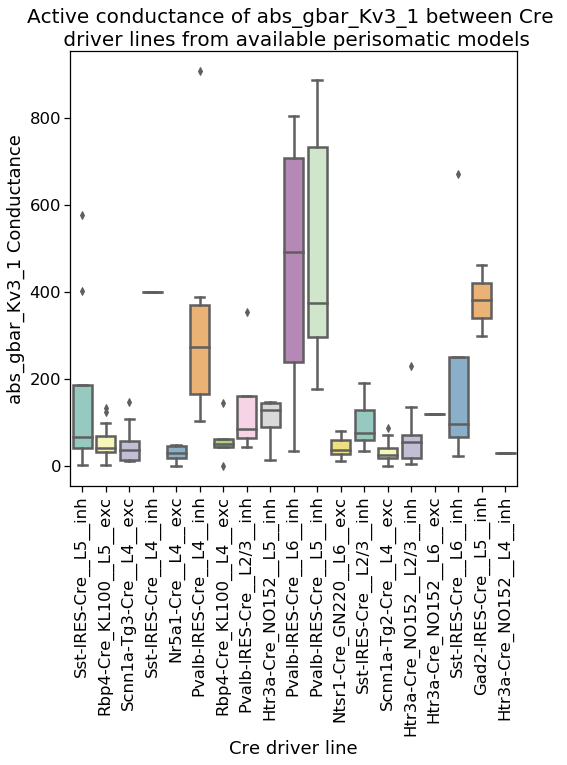

In [29]:
graph_parameter_cre('abs_gbar_Kv3_1')

In [30]:
cre_color = ['Gad2-IRES-Cre__L5__inh',
 'Htr3a-Cre_NO152__L2/3__inh',
 'Htr3a-Cre_NO152__L4__inh',
 'Htr3a-Cre_NO152__L5__inh',
 'Htr3a-Cre_NO152__L5-L6__exc',
 'Nr5a1-Cre__L4__exc',
 'Ntsr1-Cre_GN220__L6__exc',
 'Pvalb-IRES-Cre__L2/3__inh',
 'Pvalb-IRES-Cre__L4__inh',
 'Pvalb-IRES-Cre__L5__inh',
 'Pvalb-IRES-Cre__L6__inh',
 'Rbp4-Cre_KL100__L4__exc',
 'Rbp4-Cre_KL100__L5__exc',
 'Scnn1a-Tg2-Cre__L4__exc',
 'Scnn1a-Tg3-Cre__L2/3-L4__exc',
 'Sst-IRES-Cre__L1-L2/3__inh',
 'Sst-IRES-Cre__L4__inh',
 'Sst-IRES-Cre__L5__inh',
 'Sst-IRES-Cre__L6__inh']

cre_line_palette = {'Gad2-IRES-Cre__L5__inh':"#D98463", 'Htr3a-Cre_NO152__L2/3__inh':"#DF6BC6", 'Htr3a-Cre_NO152__L4__inh':"#DF6BC6", 
                    'Htr3a-Cre_NO152__L5__inh':"#DF6BC6", 'Htr3a-Cre_NO152__L5-L6__exc':"#DF6BC6", 
                    'Nr5a1-Cre__L4__exc':"#43BCA9",
 'Ntsr1-Cre_GN220__L6__exc':"#70849A",
 'Pvalb-IRES-Cre__L2/3__inh':"#CD3449",
 'Pvalb-IRES-Cre__L4__inh':"#CD3449",
 'Pvalb-IRES-Cre__L5__inh':"#CD3449",
 'Pvalb-IRES-Cre__L6__inh':"#CD3449",
 'Rbp4-Cre_KL100__L4__exc':"#009B81",
 'Rbp4-Cre_KL100__L5__exc':"#009B81",
 'Scnn1a-Tg2-Cre__L4__exc':"#59B7B4",
 'Scnn1a-Tg3-Cre__L2/3-L4__exc':"#65AA8A",
 'Sst-IRES-Cre__L1-L2/3__inh':"#B35F1F",
 'Sst-IRES-Cre__L4__inh':"#B35F1F",
 'Sst-IRES-Cre__L5__inh':"#B35F1F",
 'Sst-IRES-Cre__L6__inh':"#B35F1F"}

In [31]:
def graph_conductance_exp(parameter_type, gene_symbol):
    cre_parameter_df_spec = abs_parameter_df[[parameter_type]]
    cre_conductance_filtered = cre_parameter_df_spec[cre_parameter_df_spec[parameter_type].notna()]
    filtered_cre = list(cre_conductance_filtered.index)
    
    gene_id = entrenz_symbol_s[entrenz_symbol_s == gene_symbol].index[0]
    gene_spec = transcriptome_df.loc[gene_id]
    gene_spec_filtered = pd.DataFrame(gene_spec.loc[filtered_cre])
    
    graph_spec = pd.concat([cre_conductance_filtered, gene_spec_filtered], axis = 1)
    plt.figure(figsize=(8, 8))
    plt.title('Correspondence of {} conductance \n and {} gene expression by Cre driver line'.format(parameter_type, gene_symbol))
    
    
    ax = sns.scatterplot(x=gene_id, y=parameter_type, hue=cre_color, data=graph_spec, s = 100, palette=cre_line_palette)
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., title="Cre Driver Lines")

    ax.set(xlabel='{} Transcriptomic Gene Expression'.format(gene_symbol), ylabel='{} Conductance'.format(parameter_type))

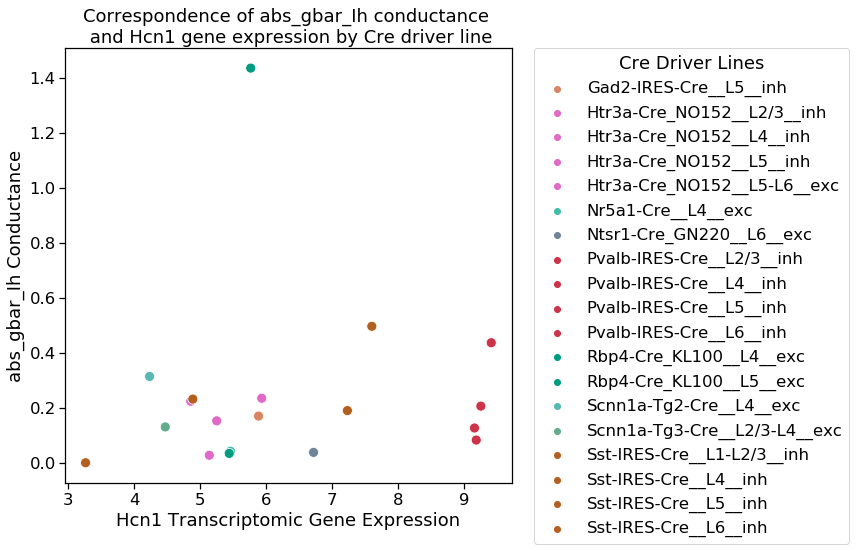

In [33]:
graph_conductance_exp('abs_gbar_Ih', 'Hcn1')

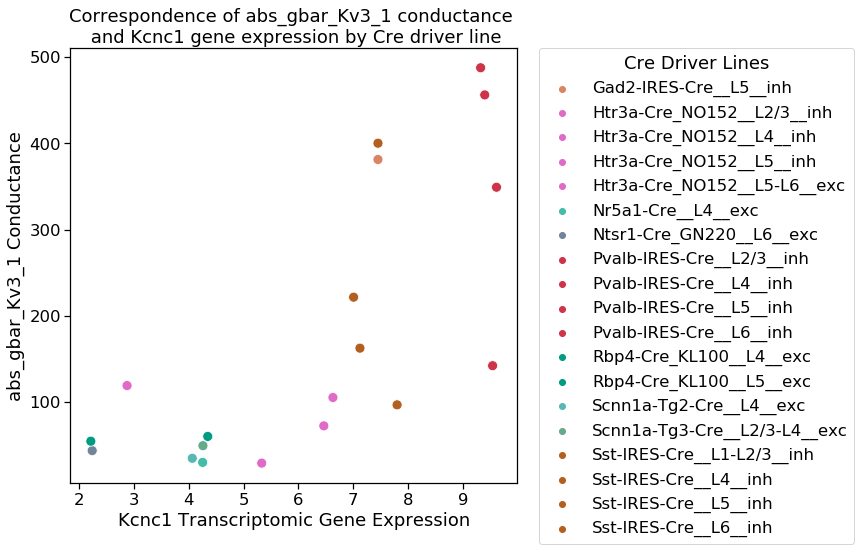

In [35]:
graph_conductance_exp('abs_gbar_Kv3_1', 'Kcnc1')

In [45]:
def spearman_conductance_exp(parameter_type, gene_symbol):
    cre_parameter_df_spec = abs_parameter_df[[parameter_type]]
    cre_conductance_filtered = cre_parameter_df_spec[cre_parameter_df_spec[parameter_type].notna()]
    filtered_cre = list(cre_conductance_filtered.index)
    
    gene_id = entrenz_symbol_s[entrenz_symbol_s == gene_symbol].index[0]
    gene_spec = transcriptome_df.loc[gene_id]
    gene_spec_filtered = pd.DataFrame(gene_spec.loc[filtered_cre])
    
    graph_spec = pd.concat([cre_conductance_filtered, gene_spec_filtered], axis = 1)

    spearman_val = graph_spec.corr(method="spearman").iloc[0, 1]
    return spearman_val

In [ ]:
spearman_corr_ranks = {}
for parameter_ranks in abs_parameters:
    spearman_corr_ranks[parameter_ranks] = {}
    for items in entrenz_symbol_s.iteritems():
        gene_symbol = items[1]
        spearman_val = spearman_conductance_exp(parameter_ranks, gene_symbol)
        spearman_corr_ranks[parameter_ranks][gene_symbol] = spearman_val
    
spearman_corr_ranks

In [46]:
spearman_conductance_exp('abs_gbar_Kv3_1', 'Kcnc1')

0.7543859649122807